In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
import datetime as dt
import calendar,warnings,itertools,matplotlib,keras,shutil
import tensorflow as tf
import statsmodels.api as sm
from datetime import datetime
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge,LinearRegression,LogisticRegression,ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor,BaggingClassifier,ExtraTreesClassifier
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc
from sklearn.datasets import load_iris,make_regression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.kernel_ridge import KernelRidge
from keras import Sequential
from keras.layers import Dense
from IPython.core import display as ICD

import pandas as pd
# Disables SettingWithCopyWarning globally
pd.set_option('mode.chained_assignment', None)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data_folder="/content/drive/MyDrive/BigSupplyCo_Data_Files"


In [ ]:
categories= pd.read_csv('/content/drive/MyDrive/BigSupplyCo_Data_Files /BigSupplyCo_Categories.csv')
customers=pd.read_csv('/content/drive/MyDrive/BigSupplyCo_Data_Files /BigSupplyCo_Customers.csv')

Departements_Cleaned=pd.read_csv('/content/drive/MyDrive/BigSupplyCo_Data_Files /BigSupplyCo_Departments_Cleaned.csv')
Orders=pd.read_csv('/content/drive/MyDrive/BigSupplyCo_Data_Files /BigSupplyCo_Orders.csv')
Products= pd.read_csv('/content/drive/MyDrive/BigSupplyCo_Data_Files /BigSupplyCo_Products.csv')

In [ ]:
Orders.columns

Index(['Unnamed: 0', 'Order Id', 'Order Item Cardprod Id', 'Order Customer Id',
       'Order Department Id', 'Market', 'Order City', 'Order Country',
       'Order Region', 'Order State', 'Order Status', 'Order Zipcode',
       'order date (DateOrders)', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Quantity',
       'Sales', 'Order Item Total', 'Order Profit', 'Type',
       'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Delivery Status', 'Late Delivery Risk'],
      dtype='object')

In [ ]:
df_cust=customers
df_cust['Customer Full Name'] = df_cust['Customer Fname'].astype(str)+df_cust['Customer Lname'].astype(str) ## since different customers could have the same First name or the last name, we create a full name
df_cust = df_cust.drop(["Customer Lname",'Customer Fname', 'Customer Street', 'Customer Email', 'Customer Password' ], axis=1) ## we drop some columns that are not important for the analysis
df_cust

,Customer Id,Customer City,Customer Country,Customer Segment,Customer State,Customer Zipcode,Customer Full Name
0,20755,Caguas,Puerto Rico,Consumer,PR,725.0,CallyHolloway
1,19492,Caguas,Puerto Rico,Consumer,PR,725.0,IreneLuna
2,19491,San Jose,EE. UU.,Consumer,CA,95125.0,GillianMaldonado
3,19490,Los Angeles,EE. UU.,Home Office,CA,90027.0,TanaTate
4,19489,Caguas,Puerto Rico,Corporate,PR,725.0,OrliHendricks
...,...,...,...,...,...,...,...
20647,18586,Caguas,Puerto Rico,Home Office,PR,725.0,DianaTran
20648,16322,Caguas,Puerto Rico,Home Office,PR,725.0,AnikaDavenport
20649,18579,Caguas,Puerto Rico,Home Office,PR,725.0,YuriSmith
20650,16244,Caguas,Puerto Rico,Home Office,PR,725.0,HyacinthWitt


In [ ]:
print(df_cust.apply(lambda x: sum(x.isnull())))          ###  checking missing values
df_cust['Customer Zipcode']=df_cust['Customer Zipcode'].fillna(0)    #Filling NaN columns with zero
print(df_cust.apply(lambda x: sum(x.isnull())))  

Customer Id           0
Customer City         0
Customer Country      0
Customer Segment      0
Customer State        0
Customer Zipcode      3
Customer Full Name    0
dtype: int64
Customer Id           0
Customer City         0
Customer Country      0
Customer Segment      0
Customer State        0
Customer Zipcode      0
Customer Full Name    0
dtype: int64


In [ ]:
Orders['Order Item Total']

0         314.640015
1         311.359985
2         309.720001
3         304.809998
4         298.250000
             ...    
180514    399.980011
180515    395.980011
180516    391.980011
180517    387.980011
180518    383.980011
Name: Order Item Total, Length: 180519, dtype: float64

In [ ]:
print(Orders.columns)
df_ord=Orders
df_ord = df_ord.drop(['Unnamed: 0', 'Order Zipcode'], axis=1)

Index(['Unnamed: 0', 'Order Id', 'Order Item Cardprod Id', 'Order Customer Id',
       'Order Department Id', 'Market', 'Order City', 'Order Country',
       'Order Region', 'Order State', 'Order Status', 'Order Zipcode',
       'order date (DateOrders)', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Quantity',
       'Sales', 'Order Item Total', 'Order Profit', 'Type',
       'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Delivery Status', 'Late Delivery Risk'],
      dtype='object')


In [ ]:
print(df_ord.apply(lambda x: sum(x.isnull()))) #checking missing values

Order Id                         0
Order Item Cardprod Id           0
Order Customer Id                0
Order Department Id              0
Market                           0
Order City                       0
Order Country                    0
Order Region                     0
Order State                      0
Order Status                     0
order date (DateOrders)          0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Id                    0
Order Item Quantity              0
Sales                            0
Order Item Total                 0
Order Profit                     0
Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Delivery Status                  0
Late Delivery Risk               0
dtype: int64


In [ ]:
df_ord.head()

,Order Id,Order Item Cardprod Id,Order Customer Id,Order Department Id,Market,Order City,Order Country,Order Region,Order State,Order Status,...,Order Item Id,Order Item Quantity,Sales,Order Item Total,Order Profit,Type,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Late Delivery Risk
0,77202,1360,20755,2,Pacific Asia,Bekasi,Indonesia,Southeast Asia,Java Occidental,COMPLETE,...,180517,1,327.75,314.640015,91.250000,DEBIT,3,4,Advance shipping,0
1,75939,1360,19492,2,Pacific Asia,Bikaner,India,South Asia,Rajastán,PENDING,...,179254,1,327.75,311.359985,-249.089996,TRANSFER,5,4,Late delivery,1
2,75938,1360,19491,2,Pacific Asia,Bikaner,India,South Asia,Rajastán,CLOSED,...,179253,1,327.75,309.720001,-247.779999,CASH,4,4,Shipping on time,0
3,75937,1360,19490,2,Pacific Asia,Townsville,Australia,Oceania,Queensland,COMPLETE,...,179252,1,327.75,304.809998,22.860001,DEBIT,3,4,Advance shipping,0
4,75936,1360,19489,2,Pacific Asia,Townsville,Australia,Oceania,Queensland,PENDING_PAYMENT,...,179251,1,327.75,298.250000,134.210007,PAYMENT,2,4,Advance shipping,0


In [ ]:
df_ord['Order Item Total']

0         314.640015
1         311.359985
2         309.720001
3         304.809998
4         298.250000
             ...    
180514    399.980011
180515    395.980011
180516    391.980011
180517    387.980011
180518    383.980011
Name: Order Item Total, Length: 180519, dtype: float64

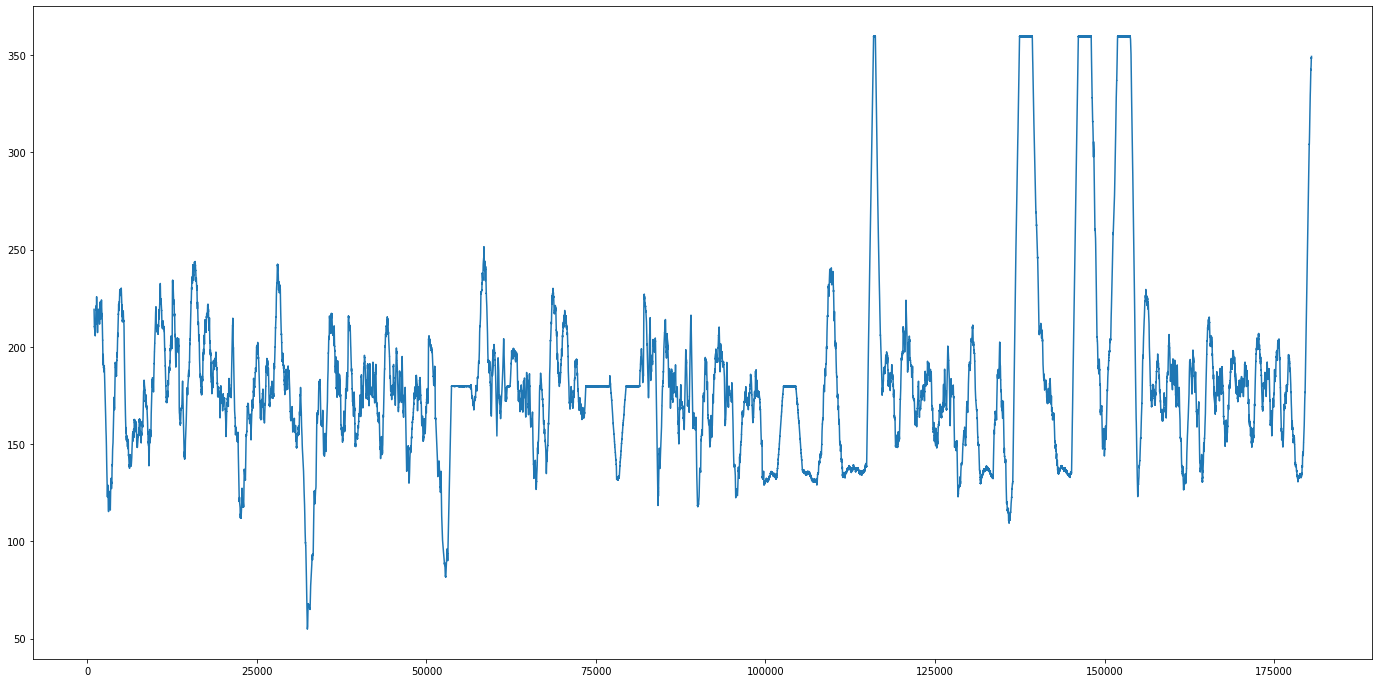

In [ ]:
(df_ord['Order Item Total'].rolling(1000).mean()).plot(figsize = (24, 12))
# Simple Moving Average. (Weird flat noticed)

In [ ]:
df_ord['order_year']= pd.DatetimeIndex(df_ord['order date (DateOrders)']).year
df_ord['order_month'] = pd.DatetimeIndex(df_ord['order date (DateOrders)']).month
df_ord['order_week_day'] = pd.DatetimeIndex(df_ord['order date (DateOrders)']).day_name
df_ord['order_hour'] = pd.DatetimeIndex(df_ord['order date (DateOrders)']).hour
df_ord['order_month_year'] = pd.to_datetime(df_ord['order date (DateOrders)']).dt.to_period('M')
#dividing order time into years,months,week day,hour to better observe the trend.

In [ ]:
Products.columns

Index(['Product Card Id', 'Product Category Id', 'Product Description',
       'Product Image', 'Product Name', 'Product Price', 'Product Status'],
      dtype='object')

In [ ]:
Products = Products.drop(['Product Description', 'Product Image', 'Product Status'], axis=1)
#dropping useless columns

In [ ]:
df_ord = df_ord.merge(Products, how = 'left', left_on = 'Order Item Cardprod Id', right_on = 'Product Card Id')
#merging products information

In [ ]:
df_ord['Order Item Total']

0         314.640015
1         311.359985
2         309.720001
3         304.809998
4         298.250000
             ...    
180514    399.980011
180515    395.980011
180516    391.980011
180517    387.980011
180518    383.980011
Name: Order Item Total, Length: 180519, dtype: float64

In [ ]:
df_ord = df_ord.merge(categories, how = 'left', left_on = 'Product Category Id', right_on = 'Category Id')
#merging categories information

In [ ]:
df_ord['Order Item Total']

0         314.640015
1         311.359985
2         309.720001
3         304.809998
4         298.250000
             ...    
180514    399.980011
180515    395.980011
180516    391.980011
180517    387.980011
180518    383.980011
Name: Order Item Total, Length: 180519, dtype: float64

In [ ]:
df_ord = df_ord.merge(df_cust, how = 'left', left_on = 'Order Customer Id', right_on = 'Customer Id')
#merging customers information

In [ ]:
df_ord['Order Item Total']

0         314.640015
1         311.359985
2         309.720001
3         304.809998
4         298.250000
             ...    
180514    399.980011
180515    395.980011
180516    391.980011
180517    387.980011
180518    383.980011
Name: Order Item Total, Length: 180519, dtype: float64

In [ ]:
Departements_Cleaned = Departements_Cleaned.drop(['Latitude', 'Longitude'], axis=1)

In [ ]:
Departements_Cleaned.columns

Index(['Department Id', 'Department Name'], dtype='object')

In [ ]:
df_ord = df_ord.merge(Departements_Cleaned, how = 'left', left_on = 'Order Department Id', right_on = 'Department Id')
#merging departments information

In [ ]:
df_ord['Order Item Total']

0         314.640015
1         311.359985
2         309.720001
3         304.809998
4         298.250000
             ...    
180514    399.980011
180515    395.980011
180516    391.980011
180517    387.980011
180518    383.980011
Name: Order Item Total, Length: 180519, dtype: float64

In [ ]:
df_ord.columns

Index(['Order Id', 'Order Item Cardprod Id', 'Order Customer Id',
       'Order Department Id', 'Market', 'Order City', 'Order Country',
       'Order Region', 'Order State', 'Order Status',
       'order date (DateOrders)', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Quantity',
       'Sales', 'Order Item Total', 'Order Profit', 'Type',
       'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Delivery Status', 'Late Delivery Risk', 'order_year', 'order_month',
       'order_week_day', 'order_hour', 'order_month_year', 'Product Card Id',
       'Product Category Id', 'Product Name', 'Product Price', 'Category Id',
       'Category Name', 'Customer Id', 'Customer City', 'Customer Country',
       'Customer Segment', 'Customer State', 'Customer Zipcode',
       'Customer Full Name', 'Department Id', 'Department Name'],
      dtype='object')

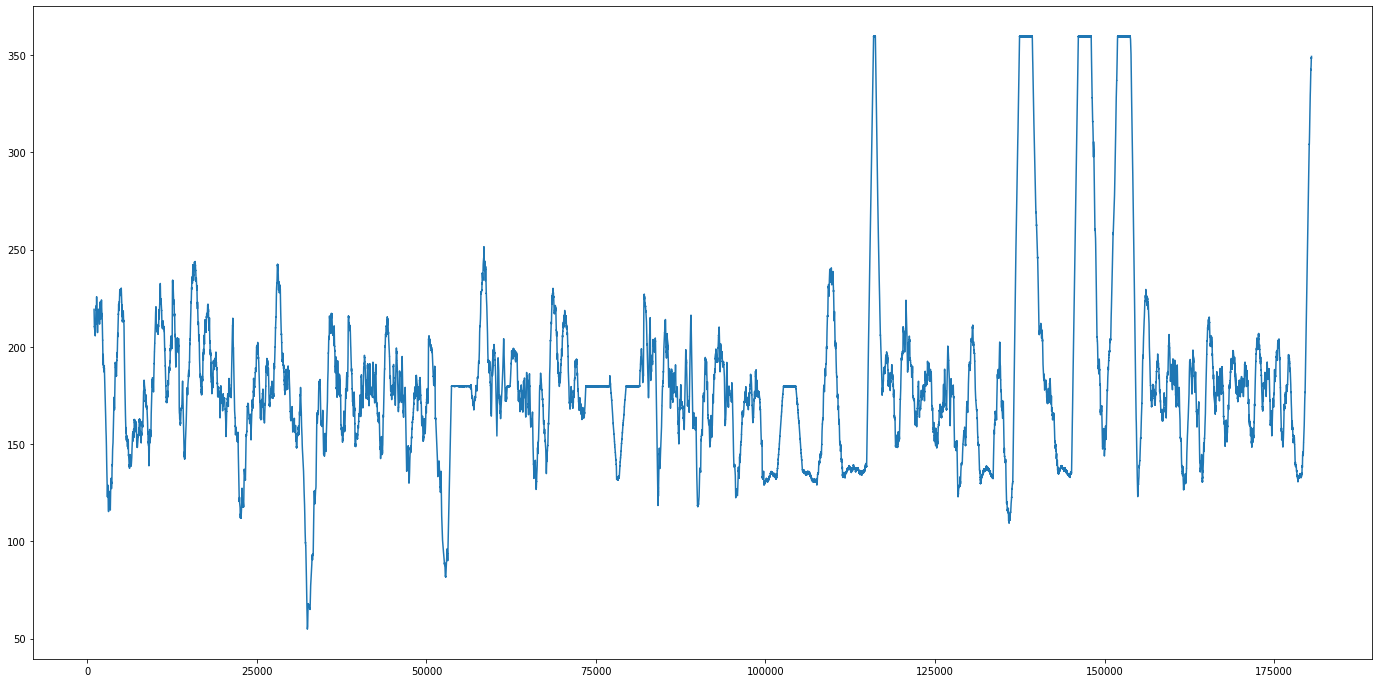

In [ ]:
(df_ord['Order Item Total'].rolling(1000).mean()).plot(figsize = (24, 12))
#Simple Moving Average(SMA) on Order Item Total (weird flat noticed)

In [ ]:
#Calculating total price for which each order
df_ord['TotalPrice'] = df_ord['Order Item Quantity'] * df_ord['Order Item Total']# Multiplying item price * Order quantity

In [ ]:
df_ord['order date (DateOrders)'].max() # Calculating when the last order come to check recency

'9/9/2017 9:50'

In [ ]:
df_ord['order date (DateOrders)'] = pd.to_datetime(df_ord['order date (DateOrders)'])

In [ ]:
train_data=df_ord.copy()

In [ ]:
train_data['fraud'] = np.where(train_data['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)
train_data['late_delivery']=np.where(train_data['Delivery Status'] == 'Late delivery', 1, 0)

In [ ]:
train_data.columns

Index(['Order Id', 'Order Item Cardprod Id', 'Order Customer Id',
       'Order Department Id', 'Market', 'Order City', 'Order Country',
       'Order Region', 'Order State', 'Order Status',
       'order date (DateOrders)', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Quantity',
       'Sales', 'Order Item Total', 'Order Profit', 'Type',
       'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Delivery Status', 'Late Delivery Risk', 'order_year', 'order_month',
       'order_week_day', 'order_hour', 'order_month_year', 'Product Card Id',
       'Product Category Id', 'Product Name', 'Product Price', 'Category Id',
       'Category Name', 'Customer Id', 'Customer City', 'Customer Country',
       'Customer Segment', 'Customer State', 'Customer Zipcode',
       'Customer Full Name', 'Department Id', 'Department Name', 'TotalPrice',
       'fraud', 'late_delivery'],
      dtype='object')

In [ ]:
#Dropping columns with repeated values
train_data.drop(['Delivery Status','Late Delivery Risk','Order Status','order_month_year','order date (DateOrders)'], axis=1, inplace=True)

In [ ]:
del train_data['order_week_day']

In [ ]:
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
train_data['Customer Country']  = le.fit_transform(train_data['Customer Country'])
train_data['Market']            = le.fit_transform(train_data['Market'])
train_data['Type']              = le.fit_transform(train_data['Type'])
train_data['Product Name']      = le.fit_transform(train_data['Product Name'])
train_data['Customer Segment']  = le.fit_transform(train_data['Customer Segment'])
train_data['Customer State']    = le.fit_transform(train_data['Customer State'])
train_data['Order Region']      = le.fit_transform(train_data['Order Region'])
train_data['Order City']        = le.fit_transform(train_data['Order City'])
train_data['Category Name']     = le.fit_transform(train_data['Category Name'])
train_data['Customer City']     = le.fit_transform(train_data['Customer City'])
train_data['Department Name']   = le.fit_transform(train_data['Department Name'])
train_data['Order State']       = le.fit_transform(train_data['Order State'])
#train_data['order_week_day']    = le.fit_transform(train_data['order_week_day'])
train_data['Order Country']     = le.fit_transform(train_data['Order Country'])
train_data['Customer Full Name']= le.fit_transform(train_data['Customer Full Name'])

#display the initial records
train_data.head()

,Order Id,Order Item Cardprod Id,Order Customer Id,Order Department Id,Market,Order City,Order Country,Order Region,Order State,Order Item Discount,...,Customer Country,Customer Segment,Customer State,Customer Zipcode,Customer Full Name,Department Id,Department Name,TotalPrice,fraud,late_delivery
0,77202,1360,20755,2,3,331,70,15,475,13.110000,...,1,0,36,725.0,1876,2,4,314.640015,0,0
1,75939,1360,19492,2,3,391,69,13,841,16.389999,...,1,0,36,725.0,5378,2,4,311.359985,0,1
2,75938,1360,19491,2,3,391,69,13,841,18.030001,...,0,0,5,95125.0,4429,2,4,309.720001,0,0
3,75937,1360,19490,2,3,3226,8,11,835,22.940001,...,0,2,5,90027.0,12929,2,4,304.809998,0,0
4,75936,1360,19489,2,3,3226,8,11,835,29.500000,...,1,1,36,725.0,10638,2,4,298.250000,0,0


In [ ]:
#All columns expect fraud
xf=train_data.loc[:, train_data.columns != 'fraud']
#Only fraud column
yf=train_data['fraud']
#Splitting the data into two parts in which 80% data will be used for training the model and 20% for testing
xf_train, xf_test,yf_train,yf_test = train_test_split(xf,yf,test_size = 0.2,random_state = 42)
#All columns expect fraud
xl=train_data.loc[:, train_data.columns != 'late_delivery']
#Only fraud column
yl=train_data['late_delivery']
#Splitting the data into two parts in which 80% data will be used for training the model and 20% for testing
xl_train, xl_test,yl_train,yl_test = train_test_split(xl,yl,test_size = 0.2, random_state = 42)

Since there are so many different variables with different ranges standard scaler is used to standardize total the data so it is internally consistent before training the data with machine learning.

In [ ]:
sc = StandardScaler()
xf_train=sc.fit_transform(xf_train)
xf_test=sc.transform(xf_test)
xl_train=sc.fit_transform(xl_train)
xl_test=sc.transform(xl_test)

The output is in binary classification format so all the models are measured with Accuracy score,recall score and F1 score metrics.

F1 score is used as the main metric because it is the harmonic mean of precison score and recall score.

In [ ]:
def classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test):
    model_f=model_f.fit(xf_train,yf_train) # Fitting train data for fraud detection
    model_l=model_l.fit(xl_train,yl_train) # Fitting train data for predection of late delivery
    yf_pred=model_f.predict(xf_test)
    yl_pred=model_l.predict(xl_test)  
    accuracy_f=accuracy_score(yf_pred, yf_test) #Accuracy for fraud detection
    accuracy_l=accuracy_score(yl_pred, yl_test) #Accuracy for predection of late delivery
    recall_f=recall_score(yf_pred, yf_test) #Recall score for  fraud detection
    recall_l=recall_score(yl_pred, yl_test)# Recall score for predection of late delivery
    conf_f=confusion_matrix(yf_test, yf_pred)# fraud detection
    conf_l=confusion_matrix(yl_test, yl_pred)#predection of late delivery
    f1_f=f1_score(yf_test, yf_pred)#fraud detection
    f1_l=f1_score(yl_test, yl_pred)#predection of late delivery
    print('Model paramters used are :',model_f)
    print('Accuracy of fraud status is        :', (accuracy_f)*100,'%')
    print('Recall score of fraud status is        :', (recall_f)*100,'%')
    print('Conf Matrix of fraud status is        :\n',  (conf_f))
    print('F1 score of fraud status is        :', (f1_f)*100,'%')
    print('Accuracy of late delivery status is:', (accuracy_l)*100,'%')
    print('Recall score of late delivery status is:', (recall_l)*100,'%')
    print('Conf Matrix of late delivery status is: \n',(conf_l))
    print('F1 score of late delivery status is:', (f1_l)*100,'%')

In [ ]:
model_f = tree.DecisionTreeClassifier()
model_l = tree.DecisionTreeClassifier()
classifiermodel(model_f,model_l,xf_train, xf_test,yf_train,yf_test,xl_train, xl_test,yl_train,yl_test)

Model paramters used are : DecisionTreeClassifier()
Accuracy of fraud status is        : 99.07766452470639 %
Recall score of fraud status is        : 80.7372175980975 %
Conf Matrix of fraud status is        :
 [[35092   162]
 [  171   679]]
F1 score of fraud status is        : 80.30751034890596 %
Accuracy of late delivery status is: 99.3712608021272 %
Recall score of late delivery status is: 99.45915891629599 %
Conf Matrix of late delivery status is: 
 [[16200   107]
 [  120 19677]]
F1 score of late delivery status is: 99.42649250903212 %


In [ ]:
#Defining cross validation model
def cross_validation_model(model_f,model_l,xf,yf,xl,yl):
    model_f= model_f.fit(xf,yf)
    model_l = model_l.fit(xl,yl)
    scores_f = cross_val_score(model_f, xf, yf, cv=6)
    scores_l = cross_val_score(model_l, xl, yl, cv=6)
    print('Model used is',model_f)
    print('Cross validation accuracy of fraud: %0.2f (+/- %0.2f)' % (scores_f.mean(), scores_f.std() * 2))
    print('Cross validation accuracy of late : %0.2f (+/- %0.2f)' % (scores_l.mean(), scores_l.std() * 2))

In [ ]:
cross_validation_model(model_f,model_l,xf,yf,xl,yl)


Model used is DecisionTreeClassifier()
Cross validation accuracy of fraud: 0.97 (+/- 0.03)
Cross validation accuracy of late : 0.98 (+/- 0.02)


the difference between cross validated scores and accuracy scores of the model is very minimal it can be confirmed that the data is neither overfitted or underfitted.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text major ticklabel objects>)

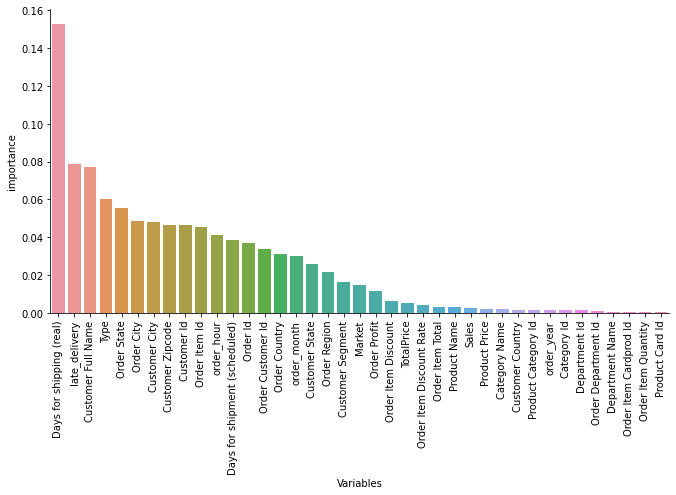

In [ ]:
#Feature importance on frauds
important_col=model_f.feature_importances_.argsort()
feat_imp=pd.DataFrame({'Variables':xf.columns[important_col],'importance':model_f.feature_importances_[important_col]})
feat_imp=feat_imp.sort_values(by='importance',ascending=False)
ax = sns.catplot(x='Variables', y = 'importance', data=feat_imp, height=5, aspect=2,  kind="bar")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text major ticklabel objects>)

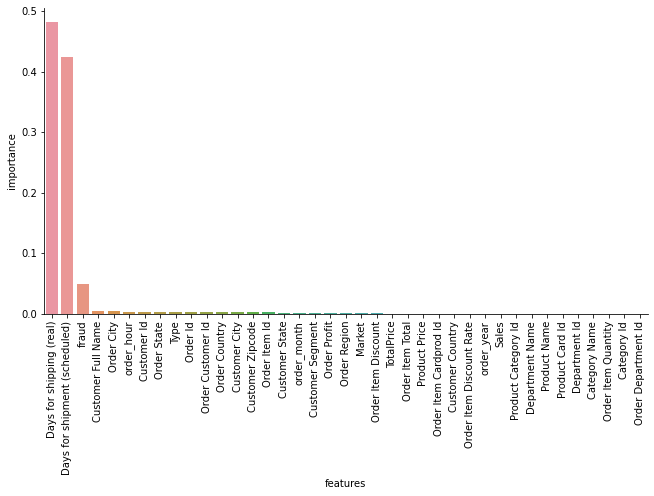

In [ ]:
#feature importance on
important_col=model_l.feature_importances_.argsort()
feat_imp=pd.DataFrame({'features':xl.columns[important_col],'importance':model_l.feature_importances_[important_col]})
feat_imp=feat_imp.sort_values(by='importance',ascending=False)
ax = sns.catplot(x='features', y = 'importance', data=feat_imp, height=5, aspect=2,  kind="bar")
plt.xticks(rotation=90)

It can be seen that the columns for the days of shipping is given almost 90% importance in decision tree model,it will be interesting to see how well the model can predict when these variables are removed.

So a new model with the copy of train data is created .

In [ ]:
new_data=train_data.copy()

In [ ]:
# Dropping columns in new data set
new_data=new_data.drop(['Days for shipping (real)','Days for shipment (scheduled)'],axis=1)

In [ ]:
#All columns expect fraud
new_xl=new_data.loc[:, new_data.columns != 'late_delivery']
#Only fraud column
new_yl=train_data['late_delivery']
#Splitting the data into two parts in which 80% data will be used for training the model and 20% for testing
new_xl_train, new_xl_test,new_yl_train,new_yl_test = train_test_split(new_xl,new_yl,test_size = 0.2,random_state = 42)

In [ ]:
new_xl_train=sc.fit_transform(new_xl_train)
new_xl_test=sc.transform(new_xl_test)

In [ ]:
def New_classifiermodel(model_c,xc_train, xc_test,yc_train,yc_test):
    model_c=model_c.fit(xc_train,yc_train)
    yc_pred=model_c.predict(xc_test) 
    accuracy_c=accuracy_score(yc_pred, yc_test)
    recall_c=recall_score(yc_pred, yc_test,average='weighted')
    conf_c=confusion_matrix(yc_test, yc_pred)
    f1_c=f1_score(yc_test, yc_pred,average='weighted')
    print('Model paramters used are :',model_c)
    print('Accuracy         :', (accuracy_c)*100,'%')
    print('Recall score        :', (recall_c)*100,'%')
    print('Conf Matrix        : \n',(conf_c))
    print('F1 score       :', (f1_c)*100,'%')

In [ ]:
new_model_l=tree.DecisionTreeClassifier()
New_classifiermodel(new_model_l,new_xl_train, new_xl_test,new_yl_train,new_yl_test)

Model paramters used are : DecisionTreeClassifier()
Accuracy         : 86.92388654996677 %
Recall score        : 86.92388654996677 %
Conf Matrix        : 
 [[14025  2282]
 [ 2439 17358]]
F1 score       : 86.92918099058356 %


Even when shipping days variables were removed the F1 score and the accuracy of the new model is nearly 84% which is still pretty good.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]), <a list of 37 Text major ticklabel objects>)

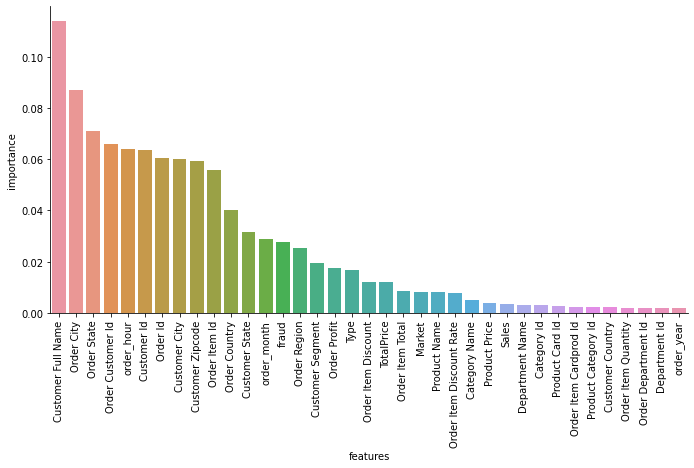

In [ ]:
important_col=new_model_l.feature_importances_.argsort()
feat_imp=pd.DataFrame({'features':new_xl.columns[important_col],'importance':new_model_l.feature_importances_[important_col]})
feat_imp=feat_imp.sort_values(by='importance',ascending=False)
ax = sns.catplot(x='features', y = 'importance', data=feat_imp, height=5, aspect=2,  kind="bar")
plt.xticks(rotation=90)